# Part 4 - Modeling

In [1]:
# Load packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset

df = pd.read_csv('Part_3.csv')

display(df.head())

,loan_status,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,...,home_ownership_OWN,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
0,1,5000.0,36,10.65,162.87,2,10.0,24000.0,1,27.65,...,0,1,3,2011,12,3,1,4,1,1
1,0,2500.0,60,15.27,59.83,3,0.0,30000.0,3,1.00,...,0,1,2,2011,12,2,4,3,1,0
2,1,2400.0,36,15.96,84.33,3,10.0,12252.0,4,8.72,...,0,1,1,2011,12,1,11,1,0,0
3,1,10000.0,36,13.49,339.31,3,10.0,49200.0,4,20.00,...,0,1,2,2011,12,2,2,4,1,1
4,1,3000.0,60,12.69,67.79,2,1.0,80000.0,4,17.94,...,0,1,2,2011,12,2,1,2,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39786 non-null  int64  
 1   loan_amnt                39786 non-null  float64
 2   term                     39786 non-null  int64  
 3   int_rate                 39786 non-null  float64
 4   installment              39786 non-null  float64
 5   sub_grade                39786 non-null  int64  
 6   emp_length               39786 non-null  float64
 7   annual_inc               39786 non-null  float64
 8   purpose                  39786 non-null  int64  
 9   dti                      39786 non-null  float64
 10  delinq_2yrs              39786 non-null  float64
 11  inq_last_6mths           39786 non-null  float64
 12  open_acc                 39786 non-null  float64
 13  pub_rec                  39786 non-null  float64
 14  revol_bal             

In [4]:
round(100*(df.isnull().sum()/len(df.index)), 2)

loan_status                0.0
loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
sub_grade                  0.0
emp_length                 0.0
annual_inc                 0.0
purpose                    0.0
dti                        0.0
delinq_2yrs                0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
pub_rec_bankruptcies       0.0
fico_score                 0.0
fico_class                 0.0
home_ownership_MORTGAGE    0.0
home_ownership_NONE        0.0
home_ownership_OTHER       0.0
home_ownership_OWN         0.0
home_ownership_RENT        0.0
verif_stat                 0.0
year_issue                 0.0
month_issue                0.0
year_ecl                   0.0
month_ecl                  0.0
geo_loc                    0.0
geo_loc_ns                 0.0
geo_loc_

In [5]:
df.columns

Index(['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score',
       'fico_class', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verif_stat', 'year_issue', 'month_issue', 'year_ecl', 'month_ecl',
       'geo_loc', 'geo_loc_ns', 'geo_loc_we'],
      dtype='object')

In [6]:
df.shape

(39786, 33)

In [7]:
from scipy import stats

z = np.abs(stats.zscore(df[['loan_status', 'loan_amnt', 'term', 'int_rate', 'installment',
       'sub_grade', 'emp_length', 'annual_inc', 'purpose', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'pub_rec_bankruptcies', 'fico_score',
       'fico_class', 'verif_stat', 'year_issue', 'month_issue',
       'year_ecl', 'month_ecl', 'geo_loc', 'geo_loc_ns', 'geo_loc_we']]))
print(z)
print()

# threshold = 4  # selecting 4 as the threshold to identify outliers
print('Below are the outliers - the index numbers and the corresponding column indices:')
print(np.where(z > 4))

[[0.40767349 0.83480512 0.60613897 ... 1.28837937 1.06806305 1.30338778]
 [2.45294338 1.16972602 1.64978667 ... 0.52837193 1.06806305 0.76723138]
 [0.40767349 1.18312286 0.60613897 ... 0.99164294 0.93627432 0.76723138]
 ...
 [0.40767349 0.83480512 0.60613897 ... 0.99164294 0.93627432 0.76723138]
 [0.40767349 0.83480512 0.60613897 ... 0.99164294 0.93627432 0.76723138]
 [0.40767349 0.49988422 0.60613897 ... 0.99164294 0.93627432 0.76723138]]

Below are the outliers - the index numbers and the corresponding column indices:
(array([   18,    27,    66, ..., 39759, 39772, 39784], dtype=int64), array([16, 10, 17, ..., 23, 16, 14], dtype=int64))


In [8]:
# Removing outliers

df_outliers_removed = df[(z<4).all(axis=1)]

In [9]:
# Data Frame shape after deleting outliers

df_outliers_removed.shape

(35622, 33)

In [10]:
X = df_outliers_removed  
y = df_outliers_removed['loan_status']

In [11]:
y.shape

(35622,)

### Clustering: KMeans
### Justifying methods: Silhouette score, Elbow-curve method, Dendrogram

In [12]:
# Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [13]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=5)

In [14]:
kmeans.labels_

array([2, 2, 2, ..., 2, 3, 2])

In [15]:
# Silhouette score

range_n_clusters = [2, 3, 4, 5]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_outliers_removed)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_outliers_removed, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5569687747076778
For n_clusters=3, the silhouette score is 0.4671801696091173
For n_clusters=4, the silhouette score is 0.40520597776860473
For n_clusters=5, the silhouette score is 0.35598109323337485


In [16]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=2, random_state=42)

In [17]:
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [18]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

<ipython-input-18-ee094727f885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_


In [19]:
df_outliers_removed['K-Means_Cluster_ID'].value_counts()

0    27667
1     7955
Name: K-Means_Cluster_ID, dtype: int64

In [20]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1              23598
                    0               4069
1                   1               7091
                    0                864
Name: loan_status, dtype: int64

In [21]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
K-Means_Cluster_ID,,,,,,,,
0,27667.0,9902.741533,6362.078254,500.0,5000.0,8500.0,13250.0,35000.0
1,7955.0,15763.387806,8625.058236,1000.0,9000.0,15000.0,22000.0,35000.0


In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_outliers_removed)

KMeans(n_clusters=3, random_state=42)

In [23]:
kmeans.labels_

array([2, 2, 2, ..., 2, 0, 2])

In [24]:
df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

<ipython-input-24-ee094727f885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_


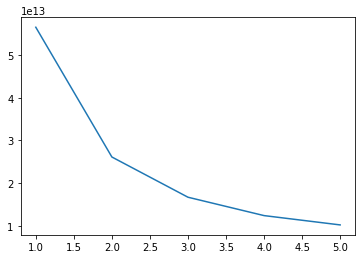

In [25]:
# Elbow-curve method

ssd = [] # Sum of squared distances
range_n_clusters = [1, 2, 3, 4, 5]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=300)
    kmeans.fit(df_outliers_removed)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters, ssd)

In [26]:
df_outliers_removed['K-Means_Cluster_ID'].value_counts()

2    21189
0    12189
1     2244
Name: K-Means_Cluster_ID, dtype: int64

In [27]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_status'].value_counts()

K-Means_Cluster_ID  loan_status
0                   1              10756
                    0               1433
1                   1               2003
                    0                241
2                   1              17930
                    0               3259
Name: loan_status, dtype: int64

In [28]:
df_outliers_removed.groupby('K-Means_Cluster_ID')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
K-Means_Cluster_ID,,,,,,,,
0,12189.0,14073.182788,8000.806213,500.0,8000.0,12000.0,20000.0,35000.0
1,2244.0,17697.381907,8897.112090,1000.0,10000.0,16000.0,25000.0,35000.0
2,21189.0,8878.472321,5566.142579,500.0,4850.0,7800.0,12000.0,35000.0


Regardless of the separation of 2 or 3 clusters, there is no clear division into the loan_status column: Fully Paid and Charged Off.

## Boxplots for selected variables

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='installment'>

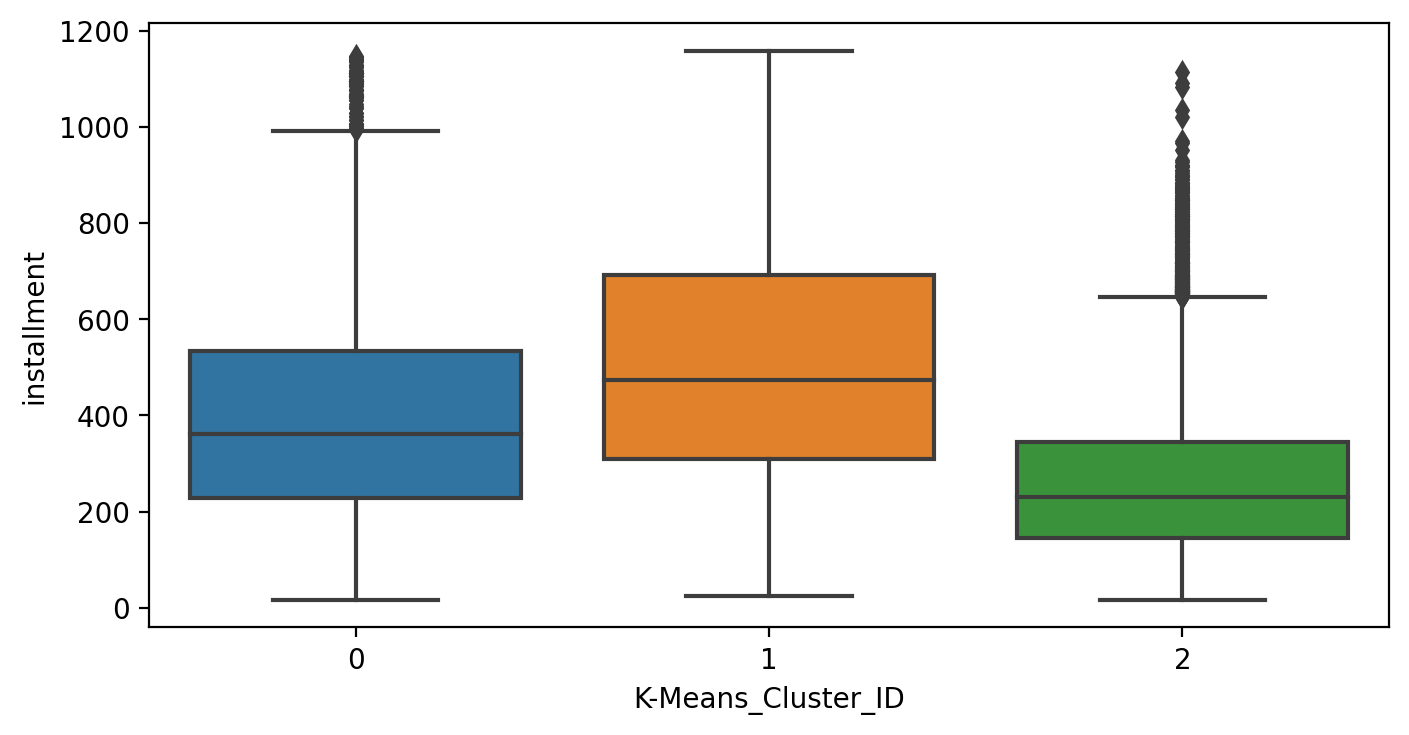

In [29]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='installment', data=df_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='loan_amnt'>

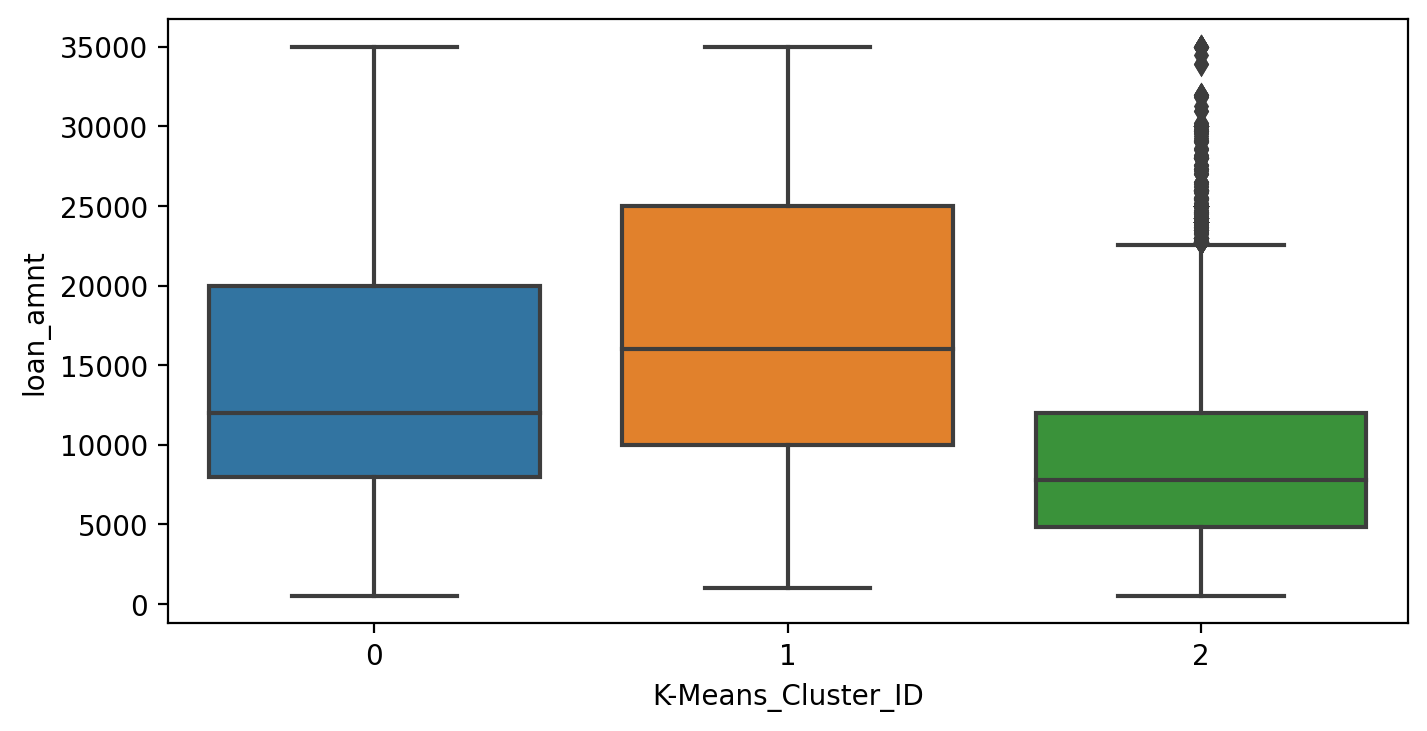

In [30]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='loan_amnt', data=df_outliers_removed)

<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='annual_inc'>

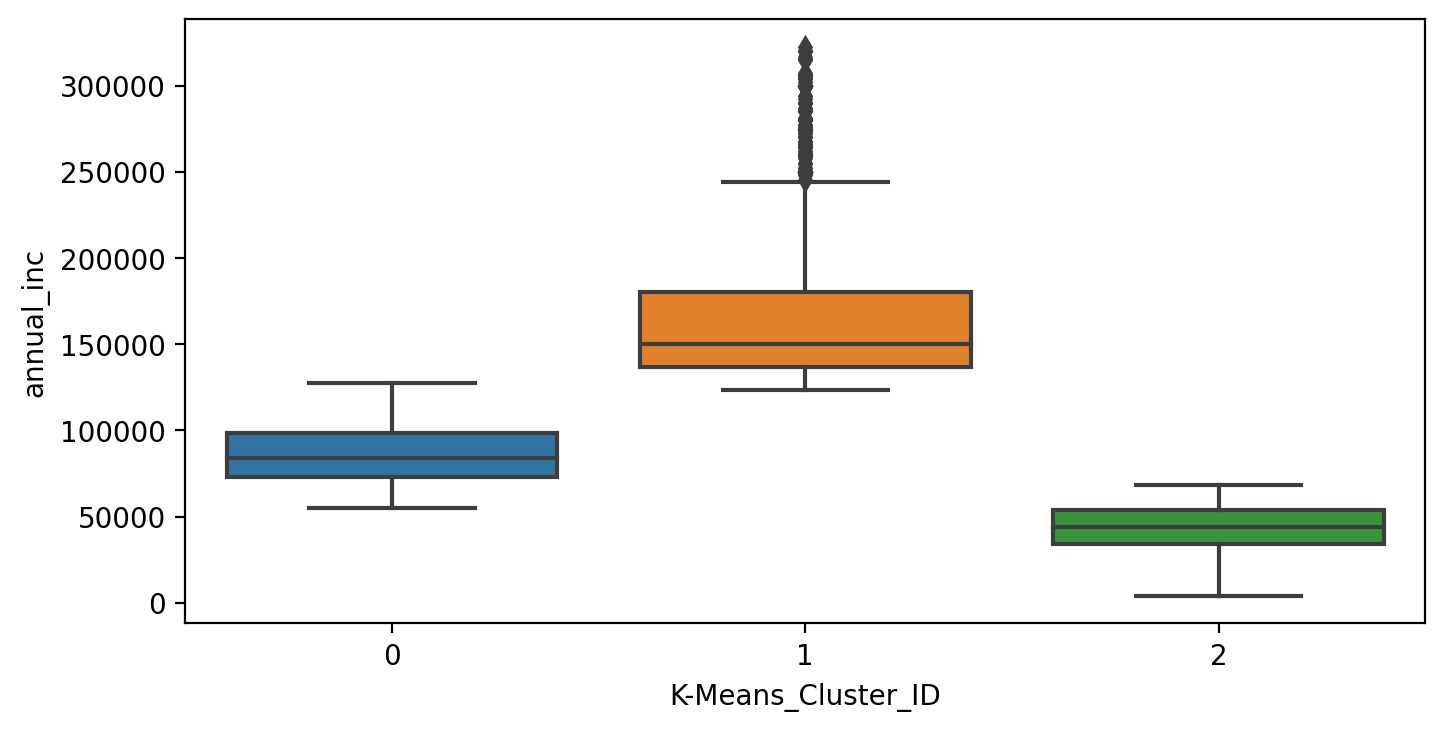

In [31]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x=df_outliers_removed['K-Means_Cluster_ID'], y='annual_inc', data=df_outliers_removed)

Mostly clusters are separated. Theoretically, there should be 2 clusters (Fully Paid and Charged Off), however, an additional cluster may include uncertain borrowers.

In [32]:
# Load libraries

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [33]:
scaler = StandardScaler()
df_outliers_removed = scaler.fit_transform(X)

In [34]:
df_outliers_removed.shape

(35622, 34)

### Decision Tree

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39786 entries, 0 to 39785
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_status              39786 non-null  int64  
 1   loan_amnt                39786 non-null  float64
 2   term                     39786 non-null  int64  
 3   int_rate                 39786 non-null  float64
 4   installment              39786 non-null  float64
 5   sub_grade                39786 non-null  int64  
 6   emp_length               39786 non-null  float64
 7   annual_inc               39786 non-null  float64
 8   purpose                  39786 non-null  int64  
 9   dti                      39786 non-null  float64
 10  delinq_2yrs              39786 non-null  float64
 11  inq_last_6mths           39786 non-null  float64
 12  open_acc                 39786 non-null  float64
 13  pub_rec                  39786 non-null  float64
 14  revol_bal             

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
def evaluate(prediction,y_test): 
    result = classification_report(y_test,prediction,output_dict=True)
    f1 = result['1']['f1-score']
    accuracy = result['accuracy']
    performance_data= {'f1-score':round(f1, 2),
                      'accuracy':round(accuracy, 2)}
    return performance_data

In [43]:
dt_prediction = dtree.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [45]:
print(classification_report(y_test,dt_prediction))

dtree_pr= evaluate(dt_prediction,y_test)
dtree_pr

              precision    recall  f1-score   support

           0       0.19      0.22      0.21      1691
           1       0.87      0.85      0.86     10245

    accuracy                           0.76     11936
   macro avg       0.53      0.53      0.53     11936
weighted avg       0.77      0.76      0.77     11936



{'f1-score': 0.86, 'accuracy': 0.76}

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
rf_prediction = rf.predict(X_test)

In [48]:
print(classification_report(y_test,rf_prediction))
rf_pr = evaluate(rf_prediction,y_test)
print(rf_pr)

              precision    recall  f1-score   support

           0       0.37      0.01      0.01      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.61      0.50      0.47     11936
weighted avg       0.79      0.86      0.79     11936

{'f1-score': 0.92, 'accuracy': 0.86}


### Random Forest using Randomized Search

In [49]:
# Randomized Search 

from sklearn.model_selection import RandomizedSearchCV

In [50]:
param_rand = {'n_estimators': np.arange(100,800,100),
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf': [1,2,4],
              'min_samples_split': [2, 5, 10],
              'max_depth' : np.arange(10,100,10),
              'max_leaf_nodes': np.arange(2,5,10),
             }

In [51]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_rand, n_iter = 100,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [52]:
rf_randomized = RandomForestClassifier(n_estimators= 600,min_samples_split= 5, min_samples_leaf = 1,
                                       max_leaf_nodes= 2,max_features= 'auto',max_depth= 70)
rf_randomized.fit(X_train,y_train)

RandomForestClassifier(max_depth=70, max_leaf_nodes=2, min_samples_split=5,
                       n_estimators=600)

In [53]:
rf_rand_prediction = rf_randomized.predict(X_test)

In [54]:
print(classification_report(y_test,rf_rand_prediction))
rf_rand_pr = evaluate(rf_rand_prediction,y_test)
rf_rand_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.43      0.50      0.46     11936
weighted avg       0.74      0.86      0.79     11936



C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precisi

{'f1-score': 0.92, 'accuracy': 0.86}

### Support Vector Machine (SVM)

In [55]:
from sklearn.svm import SVC

In [56]:
model = SVC()

In [57]:
model.fit(X_train,y_train)

SVC()

In [58]:
svm_prediction = model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,svm_prediction))
svm_pr = evaluate(svm_prediction,y_test)
svm_pr

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1691
           1       0.86      1.00      0.92     10245

    accuracy                           0.86     11936
   macro avg       0.43      0.50      0.46     11936
weighted avg       0.74      0.86      0.79     11936



C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precisi

{'f1-score': 0.92, 'accuracy': 0.86}

### K-Nearest Neighbors (KNN)

In [61]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df.drop('loan_status',axis=1))
scaled_data = scale.transform(df.drop('loan_status',axis=1))
df_scaled = pd.DataFrame(scaled_data,columns=df.drop('loan_status',axis=1).columns)
df_scaled.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,purpose,dti,delinq_2yrs,...,home_ownership_OWN,home_ownership_RENT,verif_stat,year_issue,month_issue,year_ecl,month_ecl,geo_loc,geo_loc_ns,geo_loc_we
0,-0.834805,-0.606139,-0.369659,-0.774762,-0.417449,1.407744,-0.705423,-0.740812,2.146113,-0.297942,...,-0.288856,1.050274,1.283719,0.763862,1.421299,1.600961,-1.663877,1.288379,1.068063,1.303388
1,-1.169726,1.649787,0.869805,-1.267963,0.302911,-1.398659,-0.611323,0.828788,-1.844474,-0.297942,...,-0.288856,1.050274,0.119452,0.763862,1.421299,0.271943,-0.816584,0.528372,1.068063,-0.767231
2,-1.183123,-0.606139,1.054919,-1.150694,0.302911,1.407744,-0.889671,1.613588,-0.688476,-0.297942,...,-0.288856,1.050274,-1.044814,0.763862,1.421299,-1.057075,1.160434,-0.991643,-0.936274,-0.767231
3,-0.164963,-0.606139,0.392262,0.069770,0.302911,1.407744,-0.310202,1.613588,1.000597,-0.297942,...,-0.288856,1.050274,0.119452,0.763862,1.421299,0.271943,-1.381446,1.288379,1.068063,1.303388
4,-1.102742,1.649787,0.177637,-1.229863,-0.417449,-1.118018,0.172845,1.613588,0.692132,-0.297942,...,-0.288856,1.050274,0.119452,0.763862,1.421299,0.271943,-1.663877,-0.231636,-0.936274,1.303388


In [62]:
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_data,df['loan_status'],
                                                    test_size=0.30, random_state = 42)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [64]:
knn.fit(X_scaled_train,y_scaled_train)

KNeighborsClassifier(n_neighbors=2)

In [65]:
knn_prediction = knn.predict(X_scaled_test)

In [66]:
print(classification_report(knn_prediction,y_scaled_test))
knn1_pr = evaluate(knn_prediction,y_scaled_test)
knn1_pr

              precision    recall  f1-score   support

           0       0.34      0.19      0.25      2997
           1       0.76      0.88      0.82      8939

    accuracy                           0.70     11936
   macro avg       0.55      0.53      0.53     11936
weighted avg       0.66      0.70      0.67     11936



{'f1-score': 0.82, 'accuracy': 0.7}

In [67]:
prediction_data={'Model':['Decision Tree',
                          'Random Forest',
                          'Random Forest using Randomized Search',
                          'SVM',
                          'KNN'
                         ],
                   'F1-score':[dtree_pr['f1-score'],
                              rf_pr['f1-score'],
                              rf_rand_pr['f1-score'],
                              svm_pr['f1-score'],
                              knn1_pr['f1-score']],
                 
                   'Accuracy':[dtree_pr['accuracy'],
                              rf_pr['accuracy'],
                              rf_rand_pr['accuracy'],
                              svm_pr['accuracy'],
                              knn1_pr['accuracy']]
                    }
 
# Create DataFrame
prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,F1-score,Accuracy
0,Decision Tree,0.86,0.76
1,Random Forest,0.92,0.86
2,Random Forest using Randomized Search,0.92,0.86
3,SVM,0.92,0.86
4,KNN,0.82,0.70


The three models: Random Forest, Random Forest using Randomized Search and SVM have the same high accuracy and f1_score.

# Prediction with the use of the Random Forest Classifier

In [68]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

In [69]:
# Prediction of first 20 values

print('Predicted values:', rf.predict(X[:20]))
print('Real values:') 
print(y[:20])

Predicted values: [1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1]
Real values:
0     1
1     0
2     1
3     1
4     1
5     1
6     1
7     1
8     0
9     0
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    1
Name: loan_status, dtype: int64


In [70]:
y_pred = rf.predict(X_test)
y_test == y_pred
print('Well-predicted values in testing:', (y_test == y_pred).sum())
print('All values in testing part:', y_test.shape[0])
print()
print('Accuracy = Well-predicted values in testing part/ All values in testing part:', ((y_test == y_pred).sum() / y_test.shape[0]).round(4))
print()
print('Accuracy with sklearn:', rf.score(X_test, y_test).round(4))

Well-predicted values in testing: 10233
All values in testing part: 11936

Accuracy = Well-predicted values in testing part/ All values in testing part: 0.8573

Accuracy with sklearn: 0.8573


Text(0.5, 1.0, 'Features Correlating with loan_status')

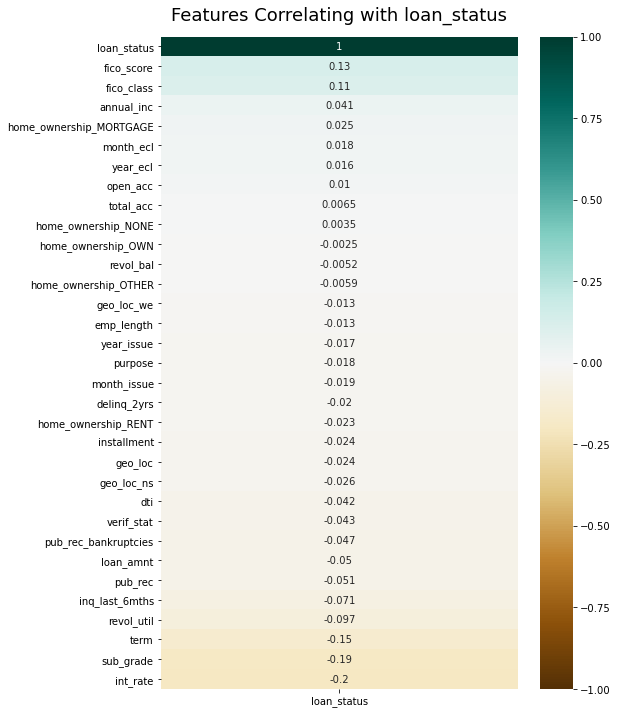

In [71]:
# The heatmap with the best correlation with loan_status

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['loan_status']].sort_values(by='loan_status', ascending = False), 
                      vmin = -1, vmax = 1, annot = True, cmap='BrBG')
heatmap.set_title('Features Correlating with loan_status', fontdict={'fontsize': 18}, pad = 16)

In [72]:
# Selecting the best correlated variables from loan_status

X = df[['int_rate', 'sub_grade', 'term', 'fico_score', 'revol_util', 'inq_last_6mths', 'pub_rec', 'loan_amnt']].values
y = df['loan_status'].values

df[['int_rate', 'sub_grade', 'term', 'fico_score', 'revol_util', 'inq_last_6mths', 'pub_rec', 'loan_amnt']]

,int_rate,sub_grade,term,fico_score,revol_util,inq_last_6mths,pub_rec,loan_amnt
0,10.65,2,36,737,83.7,1.0,0.0,5000.0
1,15.27,3,60,742,9.4,5.0,0.0,2500.0
2,15.96,3,36,737,98.5,2.0,0.0,2400.0
3,13.49,3,36,692,21.0,1.0,0.0,10000.0
4,12.69,2,60,697,53.9,0.0,0.0,3000.0
...,...,...,...,...,...,...,...,...
39781,8.07,1,36,762,13.1,0.0,0.0,2500.0
39782,10.28,3,36,692,26.9,1.0,0.0,8500.0
39783,8.07,1,36,742,19.4,0.0,0.0,5000.0
39784,7.43,1,36,812,0.7,0.0,0.0,5000.0


In [73]:
# Enter the appropriate values to predict the probability that the loan will be repaid:

int_rate = float(input('Interest Rate of the loan (0 - 100): '))
sub_grade = int(input('LC assigned loan subgrade (1 - 7): '))
term = int(input('The number of payments on the loan (36 or 60): '))
fico_score = int(input('FICO score (500 - 850): '))
revol_util = float(input('Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (0 - 100): '))
inq_last_6mths = float(input('The number of inquiries in past 6 months (0 - 8): '))
pub_rec = float(input('Number of derogatory public records (0 - 4): '))
loan_amnt = float(input('The listed amount of the loan applied for by the borrower (500 - 35000): '))

Interest Rate of the loan (0 - 100): 15
LC assigned loan subgrade (1 - 7): 4
The number of payments on the loan (36 or 60): 36
FICO score (500 - 850): 680
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (0 - 100): 77
The number of inquiries in past 6 months (0 - 8): 0
Number of derogatory public records (0 - 4): 0
The listed amount of the loan applied for by the borrower (500 - 35000): 24000


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
# Predicting whether the customer will pay off the loan (0 - No or 1 - Yes)

print(rf.predict([[int_rate, sub_grade, term, fico_score, revol_util, inq_last_6mths, pub_rec, loan_amnt]]))

[1]


# Conclusion

The project, which concerns predicting whether Lending Club clients will pay off their loans, has been divided into 4 parts: Data Processing, Exploratory Data Analysis, Feature Engineering, and Machine Learning. After a thorough cleaning of the data and the introduction of new ones, machine learning models were implemented. Five of them were tested: Decision Tree, Random Forest, Random Forest using Randomized Search, Support Vector Machine, and K-Nearest Neighbors (KNN). The three models gave the same accuracy and f1-score results (Random Forest using Randomized Search, Support Vector Machine). Finally, the Random Forest model was used to predict whether borrowers would be able to repay their loans. Based on the heatmap, the dependent variables best correlated with the target (loan_status) were selected and the Random Forest model was built only with them. By manually entering the 8 variables mentioned above, the model predicts whether the new borrower will pay back the loan.